## 2. ML for Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
import sklearn
sklearn.__version__

'1.3.0'

### 2.2 Data preparation

In [3]:
df = pd.read_csv('data/car_ddbb/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
df.columns = df.columns.str.upper().str.replace(' ', '_')

In [6]:
df.columns

Index(['MAKE', 'MODEL', 'YEAR', 'ENGINE_FUEL_TYPE', 'ENGINE_HP',
       'ENGINE_CYLINDERS', 'TRANSMISSION_TYPE', 'DRIVEN_WHEELS',
       'NUMBER_OF_DOORS', 'MARKET_CATEGORY', 'VEHICLE_SIZE', 'VEHICLE_STYLE',
       'HIGHWAY_MPG', 'CITY_MPG', 'POPULARITY', 'MSRP'],
      dtype='object')

In [7]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['MAKE',
 'MODEL',
 'ENGINE_FUEL_TYPE',
 'TRANSMISSION_TYPE',
 'DRIVEN_WHEELS',
 'MARKET_CATEGORY',
 'VEHICLE_SIZE',
 'VEHICLE_STYLE']

In [8]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.head()

,MAKE,MODEL,YEAR,ENGINE_FUEL_TYPE,ENGINE_HP,ENGINE_CYLINDERS,TRANSMISSION_TYPE,DRIVEN_WHEELS,NUMBER_OF_DOORS,MARKET_CATEGORY,VEHICLE_SIZE,VEHICLE_STYLE,HIGHWAY_MPG,CITY_MPG,POPULARITY,MSRP
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### 2.3 Exploratory Data Analysis

In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print("Number of unique values: ", df[col].nunique())
    print()
    print("-----------------")
    print()
    

MAKE
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Number of unique values:  48

-----------------

MODEL
['1_series_m' '1_series' '100' '124_spider' '190-class']
Number of unique values:  914

-----------------

YEAR
[2011 2012 2013 1992 1993]
Number of unique values:  28

-----------------

ENGINE_FUEL_TYPE
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Number of unique values:  10

-----------------

ENGINE_HP
[335. 300. 230. 320. 172.]
Number of unique values:  356

-----------------

ENGINE_CYLINDERS
[ 6.  4.  5.  8. 12.]
Number of unique values:  9

-----------------

TRANSMISSION_TYPE
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Number of unique values:  5

-----------------

DRIVEN_WHEELS
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Number of unique values:  4

-----------------

NUMBER_OF_DOORS
[ 2.  4.  3. nan]
Number of unique values:  3

-----

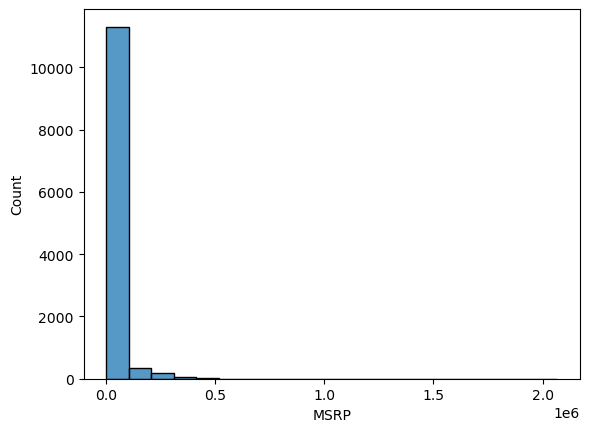

In [11]:
# Distribution of price - Long tail distribution
sns.histplot(df.MSRP, bins=20)
plt.show()

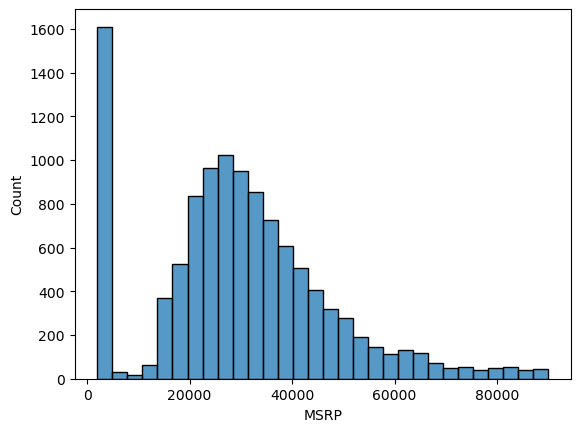

In [12]:
# Distribution of price
sns.histplot(df.MSRP[df.MSRP < 90000], bins=30)
plt.show()

In [13]:
price_logs = np.log1p(df.MSRP)

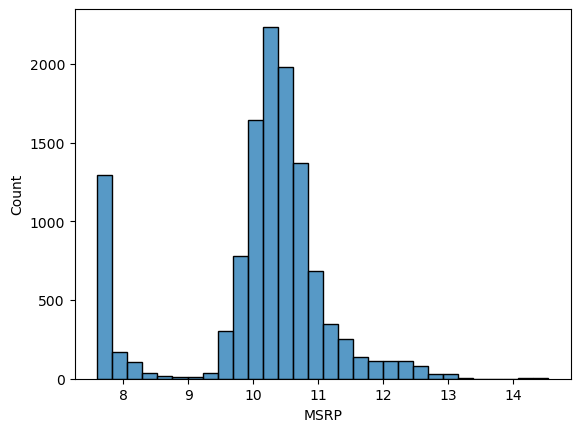

In [14]:
sns.histplot(price_logs, bins=30)
plt.show()

Null values

In [15]:
df.isnull().sum()

MAKE                    0
MODEL                   0
YEAR                    0
ENGINE_FUEL_TYPE        3
ENGINE_HP              69
ENGINE_CYLINDERS       30
TRANSMISSION_TYPE       0
DRIVEN_WHEELS           0
NUMBER_OF_DOORS         6
MARKET_CATEGORY      3742
VEHICLE_SIZE            0
VEHICLE_STYLE           0
HIGHWAY_MPG             0
CITY_MPG                0
POPULARITY              0
MSRP                    0
dtype: int64

### 2.3 Setting up the validation framework

In [16]:
n = df.shape[0]
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n, n_train + n_test +n_val

(11914, 11914)

In [17]:
df_train = df.iloc[:n_train]
df_test = df.iloc[n_train:n_train+n_test]
df_val = df.iloc[n_train+n_test:]


In [18]:
# Shuffle the data
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:n_train+n_test]]
df_val = df.iloc[idx[n_train+n_test:]]
df_train

,MAKE,MODEL,YEAR,ENGINE_FUEL_TYPE,ENGINE_HP,ENGINE_CYLINDERS,TRANSMISSION_TYPE,DRIVEN_WHEELS,NUMBER_OF_DOORS,MARKET_CATEGORY,VEHICLE_SIZE,VEHICLE_STYLE,HIGHWAY_MPG,CITY_MPG,POPULARITY,MSRP
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [19]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [20]:
# APPLY THE LOG TO MSRP
y_train = np.log1p(df_train.MSRP.values)
y_test = np.log1p(df_test.MSRP.values)
y_val = np.log1p(df_val.MSRP.values)


In [21]:
# DROP MSRP FROM TRAIN
df_train = df_train.drop(['MSRP'], axis=1)
df_test = df_test.drop(['MSRP'], axis=1)
df_val = df_val.drop(['MSRP'], axis=1)
df_train

,MAKE,MODEL,YEAR,ENGINE_FUEL_TYPE,ENGINE_HP,ENGINE_CYLINDERS,TRANSMISSION_TYPE,DRIVEN_WHEELS,NUMBER_OF_DOORS,MARKET_CATEGORY,VEHICLE_SIZE,VEHICLE_STYLE,HIGHWAY_MPG,CITY_MPG,POPULARITY
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


### 2.4 Linear Regression

In [22]:
base = ['ENGINE_HP','ENGINE_CYLINDERS','HIGHWAY_MPG','CITY_MPG','POPULARITY']
X_train = pd.DataFrame(df_train, columns=base)
X_train = X_train.fillna(0).values

In [23]:
X_val = pd.DataFrame(df_val, columns=base)
X_val = X_val.fillna(0).values

In [24]:
X_val

array([[ 165.,    6.,   20.,   15.,  549.],
       [ 389.,   12.,   15.,   11.,  617.],
       [ 268.,    6.,   25.,   18., 2031.],
       ...,
       [ 250.,    6.,   22.,   15., 1851.],
       [ 174.,    4.,   42.,   31., 2202.],
       [ 256.,    6.,   27.,   20.,  640.]])

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred_val = model.predict(X_train)

<Axes: ylabel='Count'>

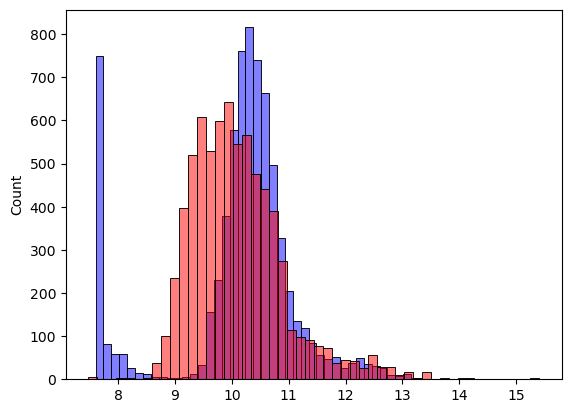

In [28]:
sns.histplot(y_train, color='blue', bins=50, alpha=0.5)
sns.histplot(y_pred_val, color='red', bins=50, alpha=0.5)


#### RMSE

In [29]:
np.sqrt(mean_squared_error(y_train, y_pred_val))

0.7554192603920132

### 2.5 Validating the model

In [30]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [31]:
X_train = prepare_X(df_train)

In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
X_val = prepare_X(df_val)

In [34]:
y_pred = model.predict(X_val)

In [35]:
np.sqrt(mean_squared_error(y_train, y_pred_val))

0.7554192603920132

### 2.6 Simple featue engineering

In [36]:
def prepare_X(df):
    df = df.copy()
    df['AGE'] = 2017 - df.YEAR
    features =  base + ['AGE']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [37]:
X_train = prepare_X(df_train)

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
X_val = prepare_X(df_val)

In [40]:
y_pred = model.predict(X_val)

In [41]:
np.sqrt(mean_squared_error(y_val, y_pred))

0.5149229218585316

<Axes: ylabel='Count'>

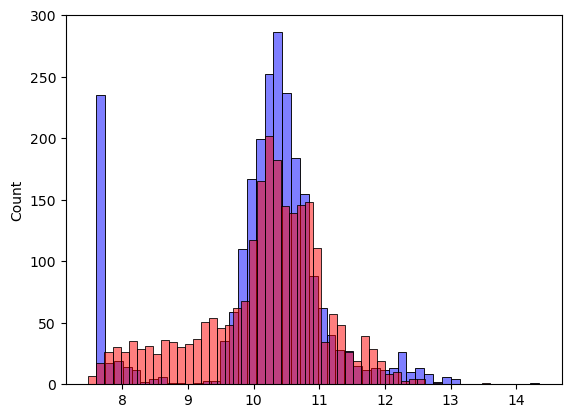

In [42]:
sns.histplot(y_val, color='blue', bins=50, alpha=0.5)
sns.histplot(y_pred, color='red', bins=50, alpha=0.5)

### 2.7 Categorical values